In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
DATA_FOLDER = '../download_from_drive/data/ProcessedO7'
img_paths = [os.path.join(DATA_FOLDER, fn) for fn in os.listdir(DATA_FOLDER)]

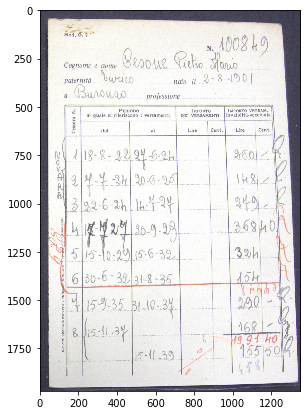

In [15]:
plt.figure(figsize=(17,7))
img = cv2.imread(img_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img); plt.show()

In [51]:
import sys
sys.path.append('../')
from scan import DocScanner

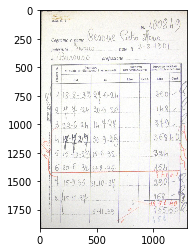

In [52]:
scanner = DocScanner()
res = scanner.scan(img)
plt.imshow(res)

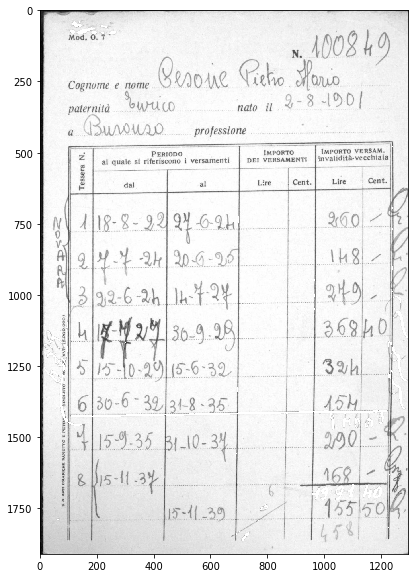

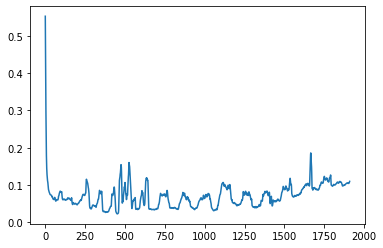

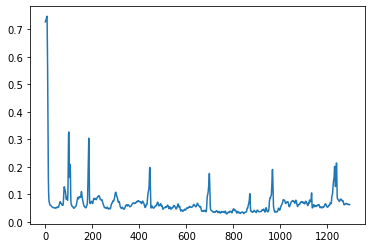

In [53]:
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
gray[res.std(axis=2)>20] = 255
plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray'); plt.show()
plt.plot(1. - gray.sum(axis=1)/(gray.shape[1]*255)); plt.show()
plt.plot(1. - gray.sum(axis=0)/(gray.shape[0]*255)); plt.show()

In [64]:
from scipy.signal import find_peaks

143


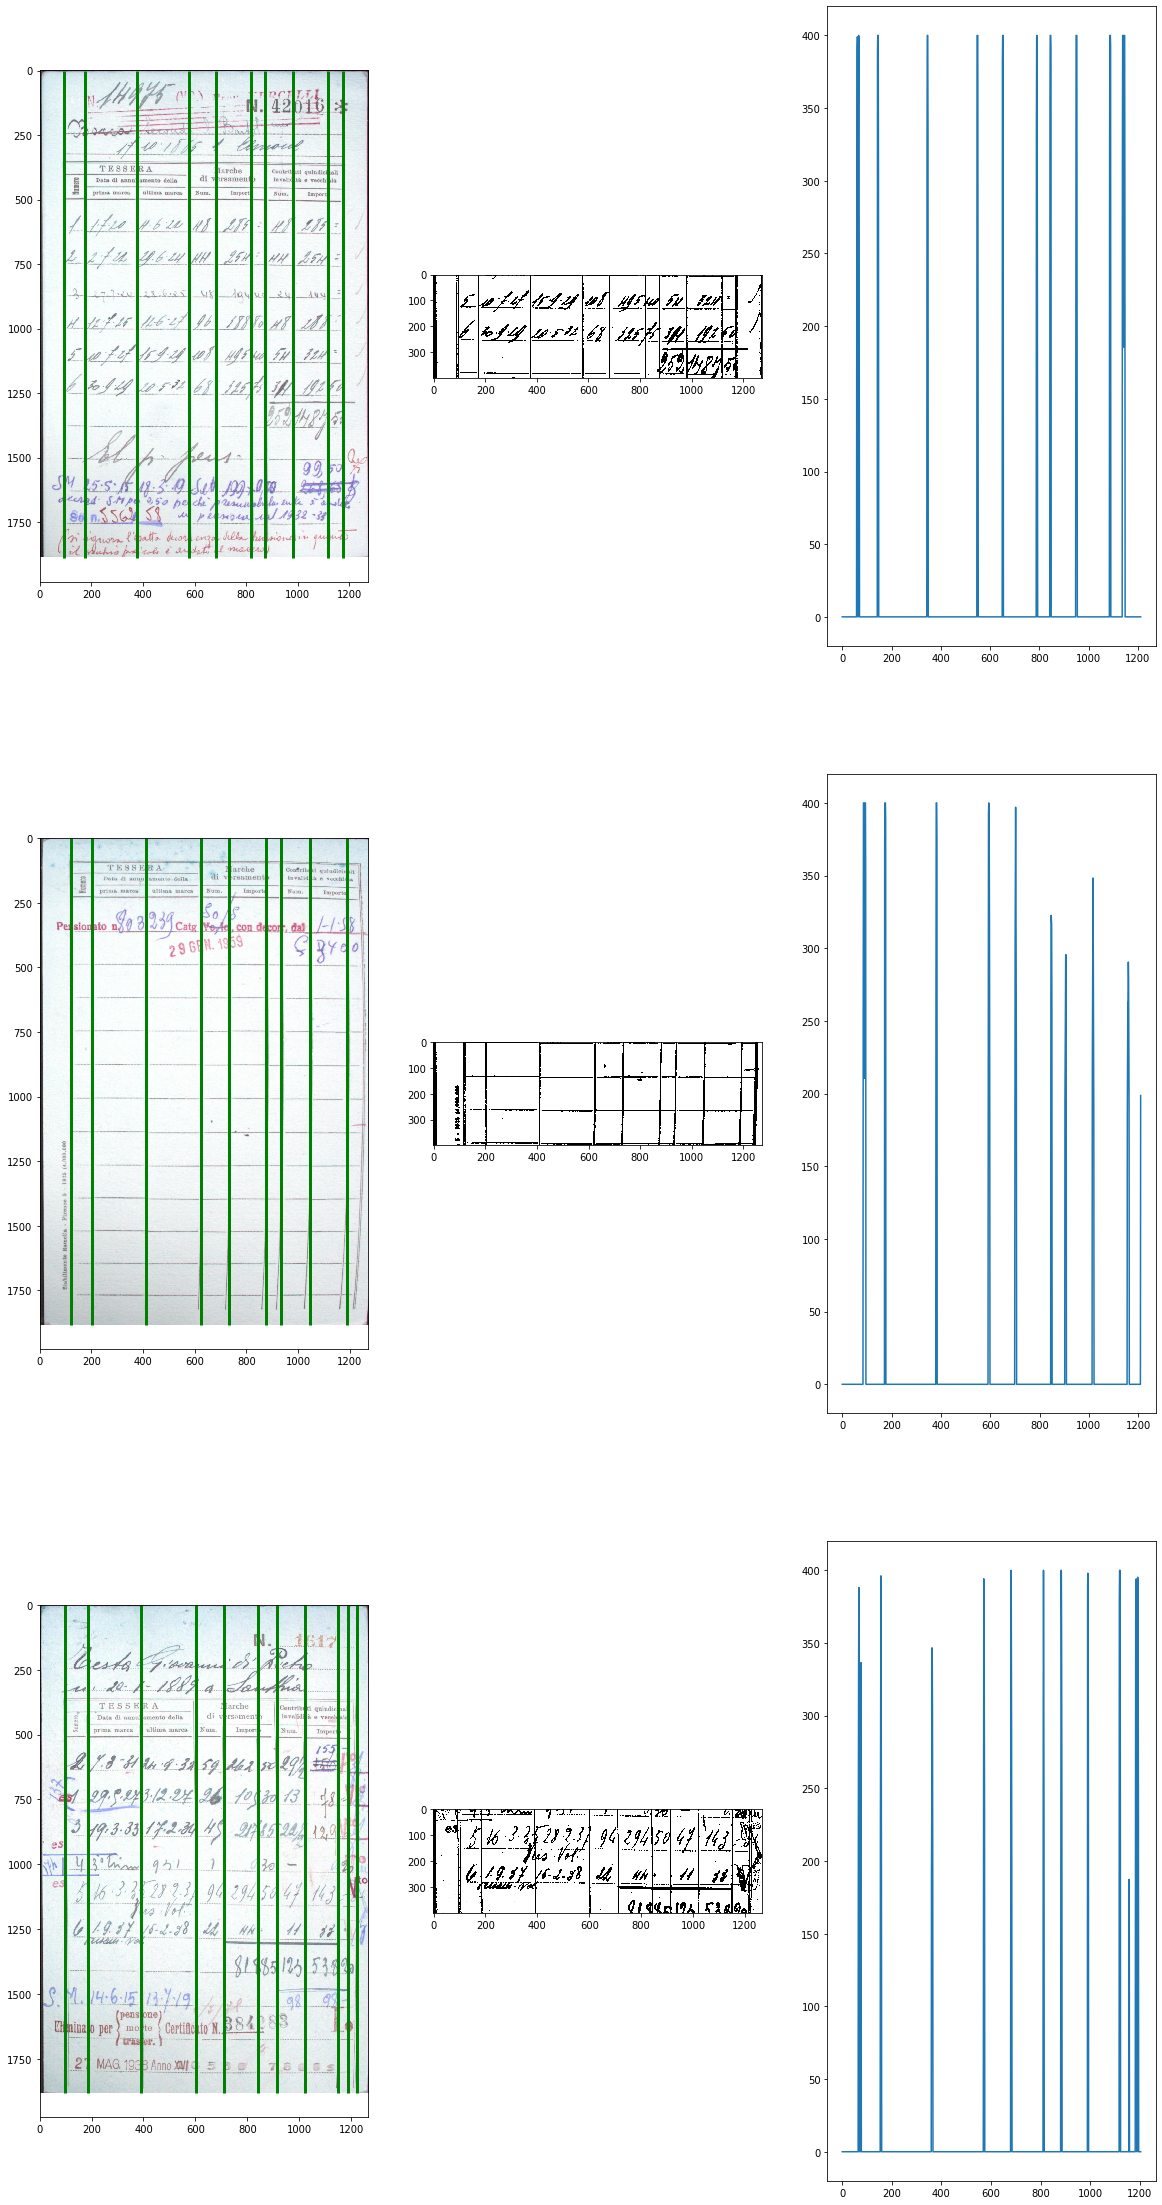

In [92]:
fig, axes = plt.subplots(3, 3, figsize=(20, 40))
axes = axes
n = np.random.randint(100, 160)
print(n)
for path, ax in zip(img_paths[20:], axes):
#     path = os.path.join(data_folder, fn)
    img = cv2.imread(path)
    scanner = DocScanner()
    img = scanner.scan(img)
    oimg = img.copy()
    img = oimg[1000:1400].copy()
#     mask1 = img.sum(axis=2) < 650
#     mask2 = np.abs(img[:,:,0] - img[:,:,1]) < 20
#     mask3 = np.abs(img[:,:,0] - img[:,:,2]) < 20
#     mask = mask1 * mask2 * mask3
#     img[mask] = 0
#     img[~mask] = 255
    img[abs(np.diff(img.astype(np.float32), axis=2)).max(axis=2)>50] = 255
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray[gray<230] = 0
    gray[gray>230] = 255
#     gray = cv2.blur(gray, (1, 99))
    ax[0].imshow(oimg)
    ax[1].imshow(gray, 'gray')
    spectrum = gray.sum(axis=0)[30:-30].astype(np.float32)/255
    spectrum = spectrum.max() - spectrum
    spectrum[spectrum<180] = 0
    peaks = find_peaks(spectrum, distance=30)[0] + 30
    ax[2].plot(spectrum)
    ax[0].vlines(peaks, 0, oimg.shape[0], color='g', lw=3)
plt.show()

117


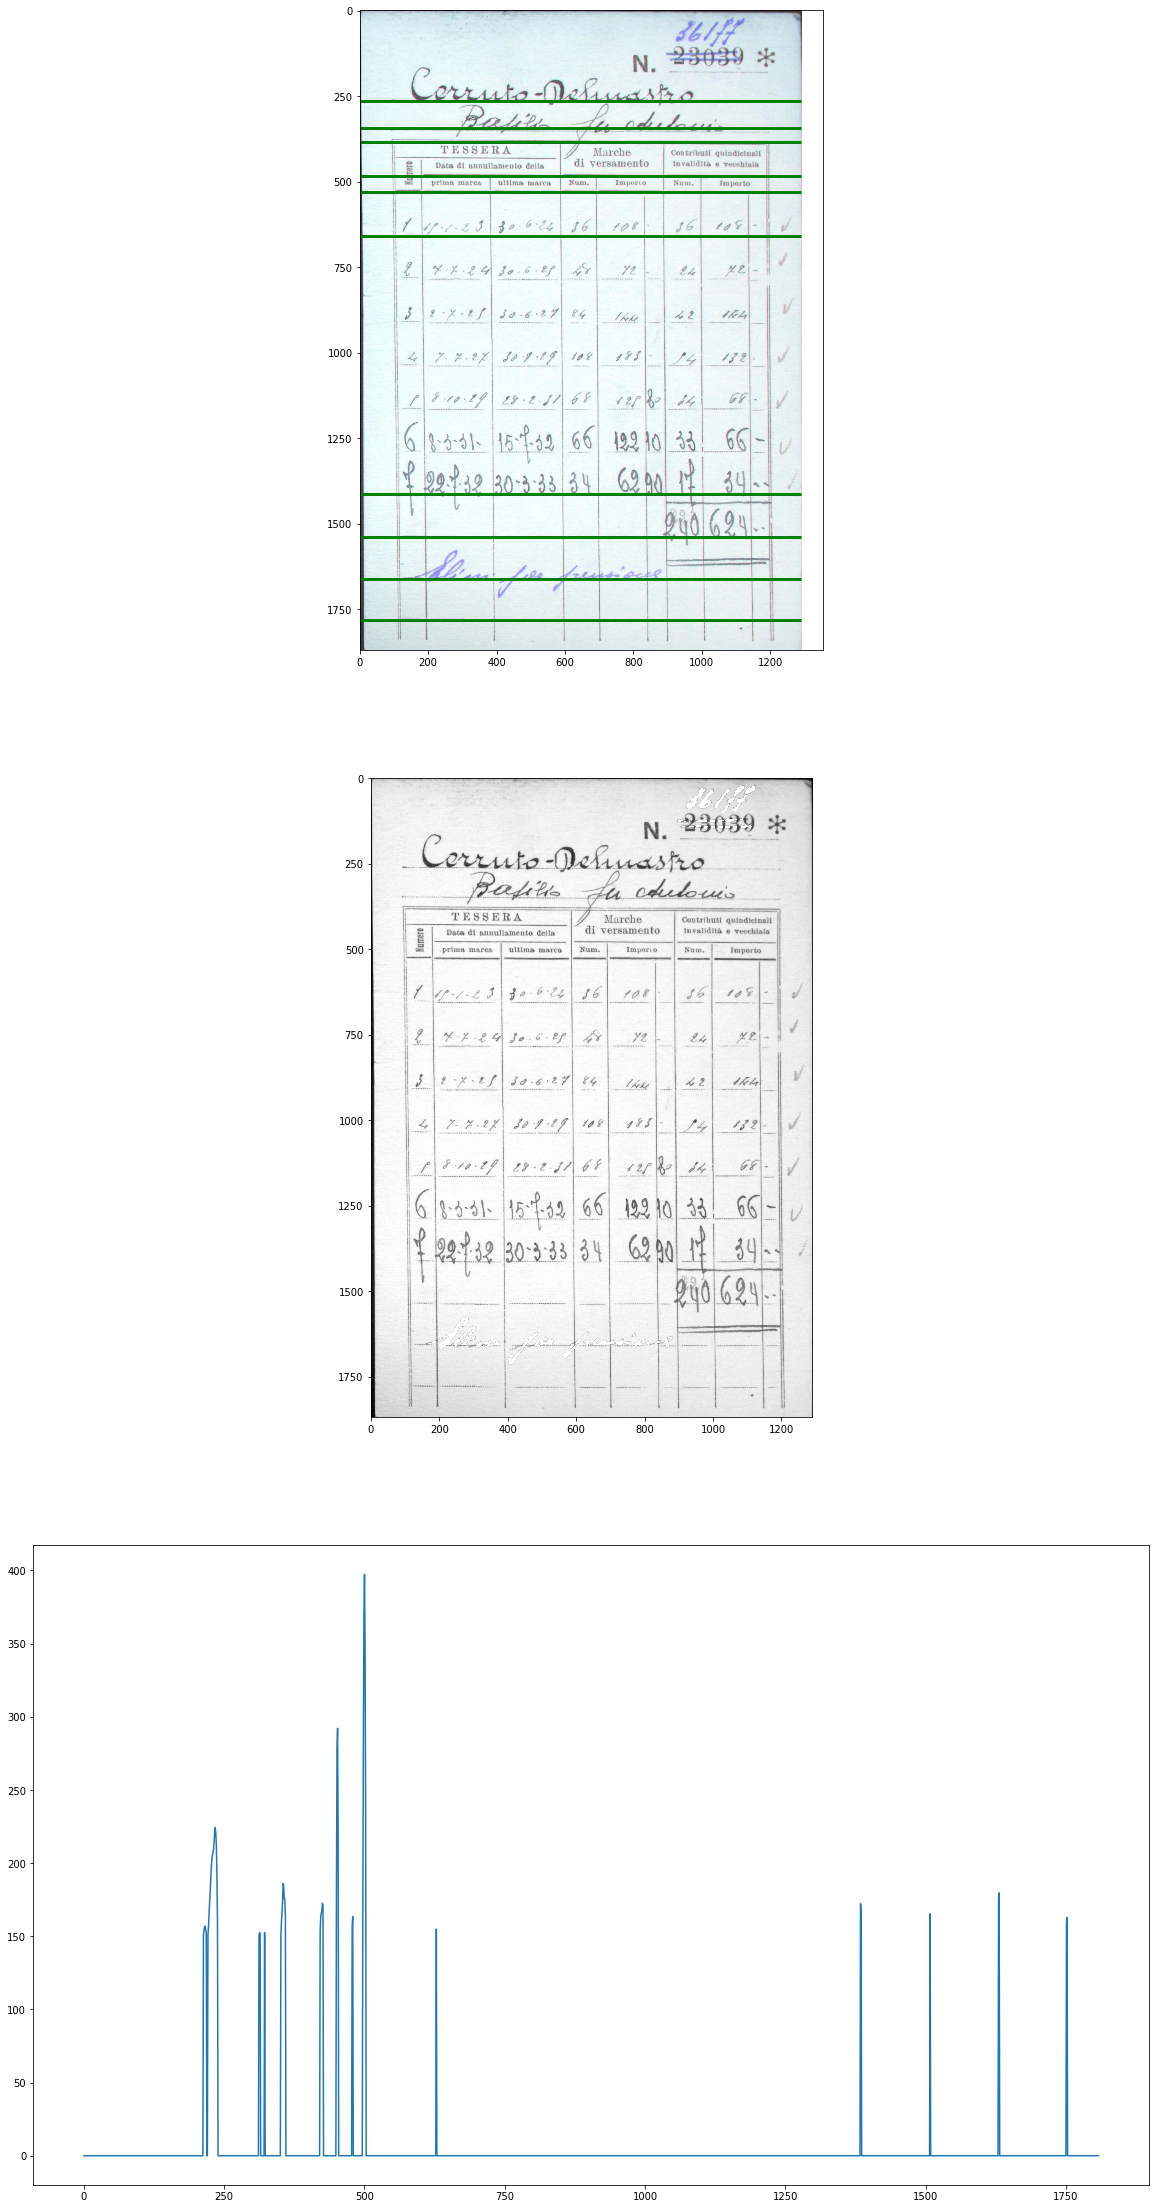

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(20, 40))
axes = [axes]
n = np.random.randint(100, 160)
print(n)
for path, ax in zip(img_paths[90:], axes):
#     path = os.path.join(data_folder, fn)
    img = cv2.imread(path)
    scanner = DocScanner()
    img = scanner.scan(img)
    oimg = img.copy()
    img = oimg.copy()
#     mask1 = img.sum(axis=2) < 650
#     mask2 = np.abs(img[:,:,0] - img[:,:,1]) < 20
#     mask3 = np.abs(img[:,:,0] - img[:,:,2]) < 20
#     mask = mask1 * mask2 * mask3
#     img[mask] = 0
#     img[~mask] = 255
    img[abs(np.diff(img.astype(np.float32), axis=2)).max(axis=2)>50] = 255
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray[gray<230] = 0
#     gray[gray>230] = 255
#     gray = cv2.blur(gray, (1, 99))
    ax[0].imshow(oimg)
    ax[1].imshow(gray, 'gray')
    spectrum = gray.sum(axis=1)[30:-30].astype(np.float32)/255
    spectrum = spectrum.max() - spectrum
    spectrum[spectrum<150] = 0
    peaks = find_peaks(spectrum, distance=30)[0] + 30
    ax[2].plot(spectrum)
    ax[0].hlines(peaks, 0, oimg.shape[1], color='g', lw=3)
plt.show()